# F1 스코어
---

F1 스코어는 머신러닝 예측, 분류 모델의 학습 성능 평가를 위한 표현 모델로 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을수록 높은 값을 가집니다.

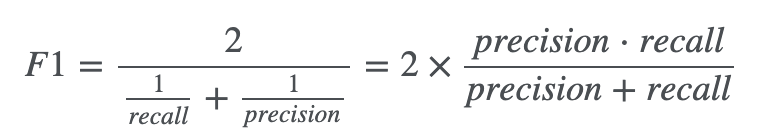

sklearn은 F1 스코어를 구하기 위해 f1_score()를 지원합니다.

## f1 스코어를 구하기 위한 로지스틱 회귀 분류 모델 생성
---

In [15]:
# 오차행렬, 정확도, 정밀도, 재현율을 한번에 출력하기 위한 함수 정의

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))

In [17]:
# 로지스틱 회귀를 이용한 분류 모델 생성

# 데이터 전처리
titanic = sns.load_dataset('titanic')
titanic = titanic.dropna()
titanic.drop(['class','who','deck','embark_town','alive'], axis=1, inplace=True)

titanic['pclass'] = pd.get_dummies(titanic['pclass'])
titanic['sex'] = titanic['sex'].astype('category').cat.codes
titanic['embarked'] = titanic['embarked'].astype('category').cat.codes
titanic['alone'] = titanic['alone'].astype('category').cat.codes

label = titanic.survived
titanic_df = titanic.drop('survived',axis=1)

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(titanic_df, label, test_size=0.2)

# 로지스틱 회귀 알고리즘을 이용한 생존자 이진 분류 모델
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

Confusion Matrix
[[10  5]
 [ 3 19]]
정확도:0.7837837837837838, 정밀도:0.7916666666666666, 재현율:0.8636363636363636


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


----

In [25]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('f1 score :', f1)

f1 score : 0.8260869565217391


앞서 생성한 회귀 분류 모델의 f1 스코어는 약 0.83으로 측정됩니다.

아래는 임계값을 0.1부터 1까지 계속해서 증가시키면서 정밀도, 재현율, f1 스코어가 어떻게 변하는지를 그래프로 나타낸 것입니다.

**(Blue: 정밀도, Red: 재현율, Green: f1 스코어)**

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\met

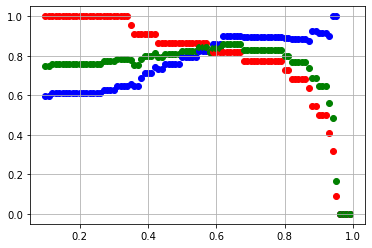

In [28]:
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

thresholds = list(np.arange(0.1, 1, 0.01))
pred_proba = lr_clf.predict_proba(X_test)

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    for i in thresholds:
        binarizer = Binarizer(threshold = i).fit(pred_proba)
        pred = binarizer.transform(pred_proba)
        
        plt.scatter(i, precision_score(y_test, pred), color='b')
        plt.scatter(i, recall_score(y_test, pred), color='r')
        plt.scatter(i, f1_score(y_test, pred), color='g')

get_eval_by_threshold(y_test, pred_proba[:,-1].reshape(-1, 1), thresholds)

plt.grid()
plt.show()

처음에 f1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때 높은 값을 갖는다고 설명했습니다.

그래프 역시 정밀도와 재현율이 양극단으로 치우쳐짐과 동시에 f1 스코어 역시 하락하는 것을 확인할 수 있습니다.